Name: Muhammad Osama     
Student Number: 1288056

# Emotion Detection in Text Messages

### Dataset
The project which i have worked on is Emotion Detection in Text Messages.
The dataset I have used contains the text messages data which have been gathered from English Twitter messages with six basic emotions, the authors constructed a set of hashtags to collect a separate dataset of English tweets from the Twitter API belonging to six basic emotion. 
Dataset have 2 features 1) "text" which contains the messages 2) "label" which shows the emotions of that text.
The messages have six basic emotions: sadness (0), joy (1), love (2), anger (3), fear (4), surprise (5).
I have taken this Dataset from Kaggle. The data set contains 2000 rows and 2 columns.
The link for dataset is https://www.kaggle.com/datasets/parulpandey/emotion-dataset

### Visualization Techniques

In [33]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
from sklearn.feature_extraction.text import CountVectorizer

# Loading the dataset
df = pd.read_csv("Text_Messages.csv") 

# Checking first 5 rows of dataset
print(df.head())

# Checking for null values
print(df.isnull().sum())

print(df.shape)

                                                text  label
0  im feeling rather rotten so im not very ambiti...      0
1          im updating my blog because i feel shitty      0
2  i never make her separate from me because i do...      0
3  i left with my bouquet of red and yellow tulip...      1
4    i was feeling a little vain when i did this one      0
text     0
label    0
dtype: int64
(2000, 2)


After loading the dataset checking for null values and printing the shape of dataset. I have also printed the first few rows of dataset to see if everything was correct.

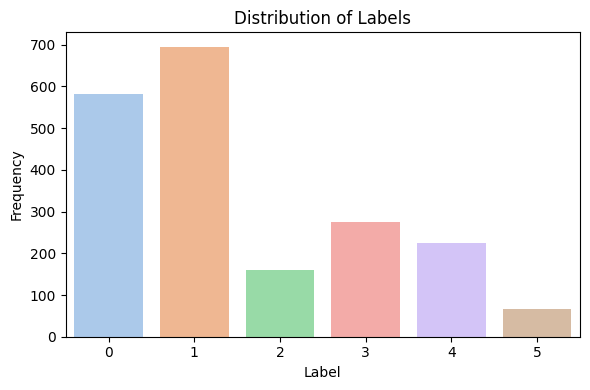

In [34]:
# Label distribution across the dataset
plt.figure(figsize=(6, 4))
sns.countplot(x='label', data=df, hue='label', palette='pastel', legend=False)
plt.title('Distribution of Labels')
plt.xlabel('Label')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

The bar graph is showing us the distribution of label across the dataset. In other words we can say how many messages are represented as which emotions. sadness (0), joy (1), love (2), anger (3), fear (4), surprise (5). This is important becasue this shows the balance of dataset here we can label 0 and 1 are dominating across the dataset.

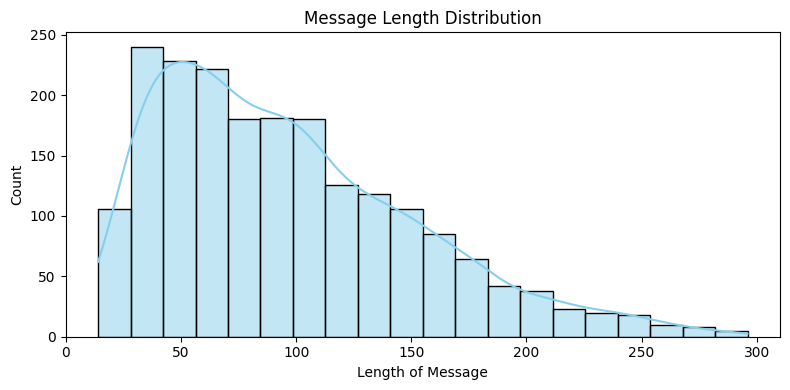

In [35]:
# Checking message length distribution across data
df['message_length'] = df['text'].astype(str).apply(len)
plt.figure(figsize=(8,4))
sns.histplot(df['message_length'], bins=20, kde=True, color='skyblue')
plt.title('Message Length Distribution')
plt.xlabel('Length of Message')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

This shows the count of text with length of message. Essentially how long the messages in your dataset are measured by character count. This is important because it can help us in tune preprocessing knowing typical lengths lets you choose good max sequence lengths for models and also for detecting anomalies because super long or short messages could be noise, spam, or formatting errors. 

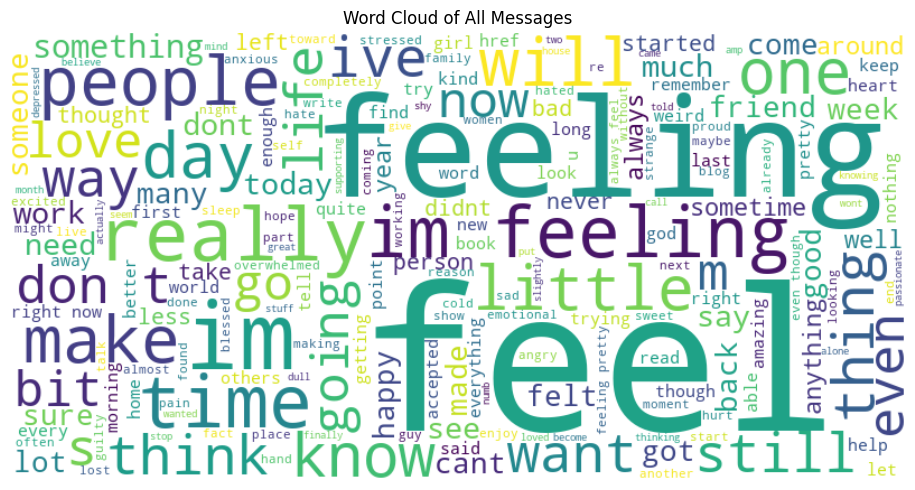

In [36]:
# Word Cloud technique for visualizing data
text_all = ' '.join(df['text'].astype(str))
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text_all)
plt.figure(figsize=(10,5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of All Messages')
plt.tight_layout()
plt.show()

Word cloud is a powerful visualization that highlights the most frequently used words in our dataset. The larger the word appears the more often it shows up across your texts. It is important to know the dominant words in our dataset and guides feature engineering. It can help us identify words worth keeping or removing, if odd or meaningless words were big like "http" or punctuation mark.

### Cleaning Text Document

### Approach 1

In [37]:
import spacy
import pandas as pd

# Loading the spacy model
nlp = spacy.load("en_core_web_lg")

# Cleaning data & lemmatize text with filtering
def spacy_clean(text):
    doc = nlp(text.lower())  # Lowercase and tokenize the text
    tokens = []
    for token in doc:
        if token.is_alpha and not token.is_stop:
            tokens.append(token.lemma_)  # Lemmatize and exclude stopwords and punctuation
    return ' '.join(tokens)

# Apply cleaning
df['cleaned_text_spacy'] = df['text'].astype(str).apply(spacy_clean)

# Printing results
print(" Approach 1 - Lemmatized Output:")
print(df[['text', 'cleaned_text_spacy']].head())

 Approach 1 - Lemmatized Output:
                                                text  \
0  im feeling rather rotten so im not very ambiti...   
1          im updating my blog because i feel shitty   
2  i never make her separate from me because i do...   
3  i left with my bouquet of red and yellow tulip...   
4    i was feeling a little vain when i did this one   

                                  cleaned_text_spacy  
0                    m feel rotten m ambitious right  
1                          m update blog feel shitty  
2            separate don t want feel like m ashamed  
3  leave bouquet red yellow tulip arm feel slight...  
4                                   feel little vain  


My first approach for data cleaning is using spacy pipeline to lemmatize input text to provide cleaner picture for ml models. I have lowercases the words, removed stop words and punctuation and then lemmatized the text. Lemmatization is important here as it converts each word to it root form, it ensures our model sees different forms of the same word as one which reduces vocabulary size and improves generalization. Thats especially important in tasks like emotion detection, where the form of the verb like "crying", "cried", "cries" is less important than its meaning.

### Approach 2

In [38]:
# Keep raw tokens, remove stopwords and punctuation
def spacy_token_clean(text):
    doc = nlp(text.lower())  # Lowercase and tokenize text
    tokens = [
        token.text for token in doc
        if token.is_alpha and not token.is_stop
    ]
    return ' '.join(tokens)

# Apply cleaning
df['cleaned_text_tokens'] = df['text'].astype(str).apply(spacy_token_clean)

# Printing results
print("\nApproach 2 - Tokenized (No Lemmatization) Output:")
print(df[['text', 'cleaned_text_tokens']].head())


Approach 2 - Tokenized (No Lemmatization) Output:
                                                text  \
0  im feeling rather rotten so im not very ambiti...   
1          im updating my blog because i feel shitty   
2  i never make her separate from me because i do...   
3  i left with my bouquet of red and yellow tulip...   
4    i was feeling a little vain when i did this one   

                                 cleaned_text_tokens  
0                 m feeling rotten m ambitious right  
1                        m updating blog feel shitty  
2            separate don t want feel like m ashamed  
3  left bouquet red yellow tulips arm feeling sli...  
4                                feeling little vain  


In my second cleaning approach I have also used sapcy pipeline however this the technique I have applied are removing stop words, removing punctuation and keeping only alphabetic tokens no numbers or symbols. It preserves the full original vocabulary, including verb tenses, plurals.

### Word Embedding Methods

### One Hot Encoding

In [39]:
from sklearn.feature_extraction.text import CountVectorizer
import numpy as np

# One Hot Encoding for Lemmatized Text approach 1
documents_lemma = df['cleaned_text_spacy'].tolist()

vectorizer_lemma = CountVectorizer(binary=True)
X_lemma = vectorizer_lemma.fit_transform(documents_lemma)
one_hot_lemma = X_lemma.toarray()

print("One Hot (Lemmatized) feature names:", vectorizer_lemma.get_feature_names_out())
print("One-Hot Encoded vectors (Lemmatized):\n", one_hot_lemma)

# One Hot Encoding for Tokenized Text approach 2
documents_token = df['cleaned_text_tokens'].tolist()

vectorizer_token = CountVectorizer(binary=True)
X_token = vectorizer_token.fit_transform(documents_token)
one_hot_token = X_token.toarray()

print("\n One Hot (Tokenized) feature names:", vectorizer_token.get_feature_names_out())
print("One-Hot Encoded vectors (Tokenized):\n", one_hot_token)

One Hot (Lemmatized) feature names: ['aaaah' 'abandon' 'abandonment' ... 'ziplock' 'zjs' 'zofran']
One-Hot Encoded vectors (Lemmatized):
 [[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]

 One Hot (Tokenized) feature names: ['aaaah' 'abandoned' 'abandoning' ... 'ziplocks' 'zjs' 'zofran']
One-Hot Encoded vectors (Tokenized):
 [[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


The first word embedding technique I have used is One Hot Encoding. I have applied One Hot Encoding to both the lemmatized and tokenized versions of the text messages. Using CountVectorizer from scikit-learn with binary=True. In One Hot Encoding transforms each preprocessed message into a sparse binary vector and converts the presence of word as 1 and absence as 0. One Hot Encoding gives a baseline text representation it is simple but effective for small and moderate data sizes. It transforms each message into a vector showing which words exist but not shows how often and the converts the sparse matrix into a numpy array for modeling.

### TF-IDF

In [40]:
from sklearn.feature_extraction.text import TfidfVectorizer

# TF-IDF for Lemmatized Text approach 1
tfidf_vectorizer_lemma = TfidfVectorizer()
X_tfidf_lemma = tfidf_vectorizer_lemma.fit_transform(documents_lemma)
tfidf_lemma = X_tfidf_lemma.toarray()

print("TF-IDF (Lemmatized) feature name:", tfidf_vectorizer_lemma.get_feature_names_out())
print("TF-IDF vectors (Lemmatized):\n", tfidf_lemma)

# TF-IDF for Tokenized Text approach 2
tfidf_vectorizer_token = TfidfVectorizer()
X_tfidf_token = tfidf_vectorizer_token.fit_transform(documents_token)
tfidf_token = X_tfidf_token.toarray()

print("\nTF-IDF (Tokenized) feature names:", tfidf_vectorizer_token.get_feature_names_out())
print("TF IDF vector (Tokenized):\n", tfidf_token)

TF-IDF (Lemmatized) feature name: ['aaaah' 'abandon' 'abandonment' ... 'ziplock' 'zjs' 'zofran']
TF-IDF vectors (Lemmatized):
 [[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]

TF-IDF (Tokenized) feature names: ['aaaah' 'abandoned' 'abandoning' ... 'ziplocks' 'zjs' 'zofran']
TF IDF vector (Tokenized):
 [[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


The second technique I have used is TF-IDF to extract numerical feature from text data. I have applpied the technique on both approaches. Using scikit-learn's TfidfVectorizer I have generated a sparse matrices where each document is represented as a vector of weighted word frequencies. These weights reflect the importance of a word within a document relative to its frequency across the entire corpus which emphasizes on terms that are locally significant but globally rare. The vectorization technique is applied separately to preprocessed text one with lemmatization, which reduces words to their base form and second with original tokens preserved.

### WORD2VEC

In [41]:
from gensim.models import Word2Vec

# Prepare sentences for training
sentences_lemma = [text.split() for text in documents_lemma]
sentences_token = [text.split() for text in documents_token]

# train the CBOW & Skip Gram on Lemmatized text
cbow_lemma = Word2Vec(sentences_lemma, vector_size=100, window=5, min_count=1, sg=0)
skipgram_lemma = Word2Vec(sentences_lemma, vector_size=100, window=5, min_count=1, sg=1)

print(" CBOW Lemmatized Vector for 'feel':\n", cbow_lemma.wv['feel']) 
print("\n Skip-Gram Lemmatized Vector for 'feel':\n", skipgram_lemma.wv['feel'])

# Training CBOW & Skip Gram on Tokenized text
cbow_token = Word2Vec(sentences_token, vector_size=100, window=5, min_count=1, sg=0)
skipgram_token = Word2Vec(sentences_token, vector_size=100, window=5, min_count=1, sg=1)

print("\n CBOW Tokenized Vector for 'feel':\n", cbow_token.wv['feel'])
print("\n Skip-Gram Tokenized Vector for 'feel':\n", skipgram_token.wv['feel'])

 CBOW Lemmatized Vector for 'feel':
 [-0.1271629   0.34441298  0.12160901  0.06054701  0.03773492 -0.4385786
  0.35818332  0.8817806  -0.29703328 -0.2632747  -0.1105964  -0.56206304
 -0.1748127   0.32953677  0.25207245 -0.4089582   0.07557939 -0.4270711
 -0.11440885 -0.9001212   0.24565294  0.24304904  0.2600566  -0.1328315
 -0.10332271 -0.00986488 -0.33445    -0.02844533 -0.28263858  0.02866636
  0.31291693 -0.08832767  0.19446534 -0.38267544 -0.19361953  0.32232225
  0.04218569 -0.41586056 -0.24240592 -0.5763674  -0.04667878 -0.29501605
 -0.23000993  0.15175226  0.25237688 -0.23267606 -0.22613631 -0.03363961
  0.22616486  0.34984532  0.01371854 -0.2500226  -0.2316902  -0.1718242
 -0.14323737  0.10539772  0.2920303   0.11742768 -0.36977604  0.16252464
  0.06689966 -0.00101391 -0.02845335 -0.06603328 -0.34382614  0.32008013
  0.1599255   0.3748816  -0.5122216   0.43798953 -0.01956103  0.29635885
  0.41127095 -0.28483516  0.4048428   0.11831546 -0.07700534  0.15645987
 -0.22756544 -0.17

In my thrid word embedding technique I have used Word2Vec using 2 diffrent architecture Continous Bag of Words (CBOW) and Skip Gram. To analyze the effect of different Word2Vec training strategies and preprocessing techniques, I trained separate embedding models using the CBOW and SG architectures whic are provided by the gensim library. Both models are trained on lemmatized and tokenized versions of the dataset, with parameters including a vector size of 100, a window size of 5, and a minimum word frequency of 1 to ensure rare words are included. The differnce between both is that CBOW model predicts a target word given in its surrounding context, while Skip Gram does the inverse by predicting context. I have used the word "feel" which is frequently appearing in my data to show training success and inspect vector quality.

### TF-IDF Comparison

In [42]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score

# TF-IDF for approach 1
model_tfidf_lemma = LogisticRegression(max_iter=1000)
scores_tfidf_lemma = cross_val_score(model_tfidf_lemma, X_tfidf_lemma, df['label'], cv=5)

# TF-IDF for thwe approach 2
model_tfidf_tokens = LogisticRegression(max_iter=1000)
scores_tfidf_tokens = cross_val_score(model_tfidf_tokens, X_tfidf_token, df['label'], cv=5)

For my comparsion for the word embedding technique between my 2 preproccessing approaches I have used logistic regression to calculate the accuracy for both one derived from lemmatized text and the other from tokenized text and compared them. Both sets are used to trained on a logistic regression classifier with a maximum of 1000 iterations. To ensure statistical robustness and reduce overfitting, I have applied 5 fold cross validation. This approach splits the dataset into five equal folds, using four for training and one for validation in each iteration, rotating through all combinations. The resulting cross validation scores provided an average classification accuracy for each preprocessing pipeline which enabling direct comparison between them.

### One Hot Encoding Comparison

In [43]:
# One-HotEncoding for Lemmatization
model_onehot_lemma = LogisticRegression(max_iter=1000)
scores_onehot_lemma = cross_val_score(model_onehot_lemma, one_hot_lemma, df['label'], cv=5)

# One Hot Encoding for approach 2
model_onehot_tokens = LogisticRegression(max_iter=1000)
scores_onehot_tokens = cross_val_score(model_onehot_tokens, one_hot_token, df['label'], cv=5)

Same for Hot Encoding I have used Logistic regression and to avoid overfitting used cross validation with 5 folds. The classifier is trained and tested for both approaches and further we will compare the reults.

In [44]:
# showing the comparison
print("TF-IDF (Lemmatized):", scores_tfidf_lemma.mean())
print("TF-IDF (Tokenized):", scores_tfidf_tokens.mean())
print("One-Hot (Lemmatized):", scores_onehot_lemma.mean())
print("One-Hot (Tokenized):", scores_onehot_tokens.mean())

TF-IDF (Lemmatized): 0.6135
TF-IDF (Tokenized): 0.6195
One-Hot (Lemmatized): 0.6965000000000001
One-Hot (Tokenized): 0.724


To quantify the effect of different text representations and preprocessing strategies on classification performance, we computed mean accuracy scores using 5-fold cross-validation for four distinct feature configurations: TF-IDF (Lemmatized), TF-IDF (Tokenized), One-Hot Encoding (Lemmatized), and One-Hot Encoding (Tokenized). The results demonstrated that One-Hot Encoding on tokenized data yielded the highest average accuracy (72.4%), followed closely by One-Hot on lemmatized text (69.65%). In contrast, TF-IDF representations achieved comparatively lower mean accuracies (61.35% for lemmatized and 61.95% for tokenized). These findings suggest that preserving original word forms and using a presence-based encoding scheme may better capture lexical patterns relevant to emotion classification in this dataset.

### Word2Vec Comparison

In [57]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df['encoded_label'] = le.fit_transform(df['label'])

def evaluate_w2v_features(X, y, label_encoder, name):
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, stratify=y, test_size=0.2, random_state=42
    )
    model = LogisticRegression(max_iter=1000)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print(f"\n Results for {name}")
    target_names = [str(cls) for cls in label_encoder.classes_]
    print(classification_report(y_test, y_pred, target_names=target_names, zero_division=0))
y = df['encoded_label']
evaluate_w2v_features(X_w2v_lemma, y, le, "Word2Vec Skip-Gram (Lemmatized)")
evaluate_w2v_features(X_w2v_token, y, le, "Word2Vec Skip-Gram (Tokenized)")


 Results for Word2Vec Skip-Gram (Lemmatized)
              precision    recall  f1-score   support

           0       0.33      0.09      0.15       116
           1       0.34      0.89      0.49       139
           2       0.00      0.00      0.00        32
           3       0.00      0.00      0.00        55
           4       0.00      0.00      0.00        45
           5       0.00      0.00      0.00        13

    accuracy                           0.34       400
   macro avg       0.11      0.16      0.11       400
weighted avg       0.21      0.34      0.21       400


 Results for Word2Vec Skip-Gram (Tokenized)
              precision    recall  f1-score   support

           0       0.34      0.17      0.23       116
           1       0.34      0.83      0.48       139
           2       0.00      0.00      0.00        32
           3       0.00      0.00      0.00        55
           4       0.00      0.00      0.00        45
           5       0.00      0.00      0.

Here I have compared both preprocessing approaching which i earlier trained on Word2Vec using logistic regression this time I have used classification report method to show the results and comparison. I splitted the data into 80% training and 20% testing set. As shown in the classification report the model using tokenized embeddings achieved slightly improved recall and F1 scores compared to its lemmatized counterpart, particularly for classes with higher support with labels 0 and 1. However, both configurations struggled to identify minority classes labels 2–5, suggesting that Word2Vec embeddings, while semantically informative, may lack the contextual depth required for nuanced emotion detection in short texts. It can be because of the data imbalance as we have seen in earlier visualization there is clear imbalance labels 0 and 1 and are in majority as compared to others.

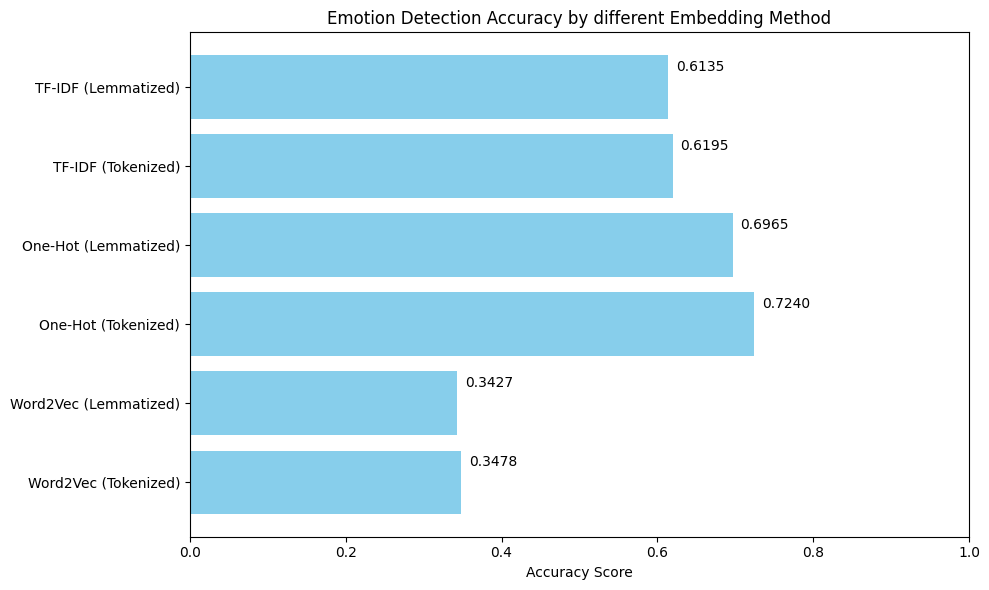

In [49]:
results = {
    "TF-IDF (Lemmatized)": 0.6135,
    "TF-IDF (Tokenized)": 0.6195,
    "One-Hot (Lemmatized)": 0.6965,
    "One-Hot (Tokenized)": 0.7240,
    "Word2Vec (Lemmatized)": 0.3427,
    "Word2Vec (Tokenized)": 0.3478
}
# extracting the label and values
labels = list(results.keys())
scores = list(results.values())

# creating the bar chart
plt.figure(figsize=(10, 6))
bars = plt.barh(labels, scores, color='skyblue')
plt.xlabel("Accuracy Score")
plt.title("Emotion Detection Accuracy by different Embedding Method")

for bar in bars:
    plt.text(bar.get_width() + 0.01, bar.get_y() + 0.2, f"{bar.get_width():.4f}", color='black')
    
plt.xlim(0, 1)
plt.gca().invert_yaxis() 
plt.tight_layout()
plt.show()

### Conclusion:
In the above bar chart I have shown the comparison between all the accuracies across all embedding strategies evaluated for emotion classification, One-Hot Encoding applied to tokenized text achieved the highest accuracy of 72.40%, outperforming more sophisticated methods like TF-IDF and Word2Vec. This suggests that preserving the original surface forms of words such as different verb tenses or emotional inflections plays a crucial role in distinguishing sentiment rich content. TF-IDF representations performed moderately well, with minimal gain from lemmatization, while Word2Vec embeddings—particularly those averaged across sentences underperformed to have accuracy of approximately 34%. This may be due to semantic dilution in short texts and Word2Vec lack of contextual awareness. The use of lemmatization did not consistently improve performance across any method, indicating that stemming to root forms may strip away emotional nuance critical to model learning. Overall, simpler count-based methods specially One Hot encoding with minimal preprocessing proved more effective in capturing emotion in this small dataset than dense, semantically compressed embeddings.

A key factor contributing to poor performance on certain emotion labels (especially labels 2 to 5) is the severe class imbalance present in the dataset. The majority of examples belong to a small subset of emotional categories of sadness and joy, while others fear, anger, or surprise) have very few instances due to which the model becomes biased toward predicting the dominant classes, often ignoring minority ones. Averaged Word2Vec embeddings struggle even more in this context, as the short, subtle cues that differentiate emotions are diluted. Standard classifiers like Logistic Regression optimize for overall accuracy, unintentionally favoring majority classes. This explains why minority labels often receive zero recall and F1-scores in the classification reports.